In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp


In [26]:
# Load the data from the specified .npz file
fileSIMS = np.load(".\\SIMS.npz", allow_pickle=True)

# # Extract the necessary components from the file
print(fileSIMS.files)

selected_B_SIMS = fileSIMS['selected_B'][()]
shape_SIMS = fileSIMS['shape'][()]
mz_values_SIMS = fileSIMS['mz'][()]



['selected_B', 'shape', 'mz']


In [3]:
selected_B_SIMS.nnz/np.prod(selected_B_SIMS.shape)
print(np.prod(shape_SIMS))

608400


In [4]:
def visualizeData(dense_matrix):
    # Create a figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the matrix using imshow with a colormap
    plt.imshow(dense_matrix, cmap='viridis', aspect='auto', interpolation='none')

    # Add a colorbar to represent the intensity of the values
    plt.colorbar(label='Intensity')

    # Add labels and title
    plt.title('Visualization of Sparse Matrix with Color Intensity')
    plt.xlabel('massbins')
    plt.ylabel('pixels')

    # Show the plot
    plt.show()

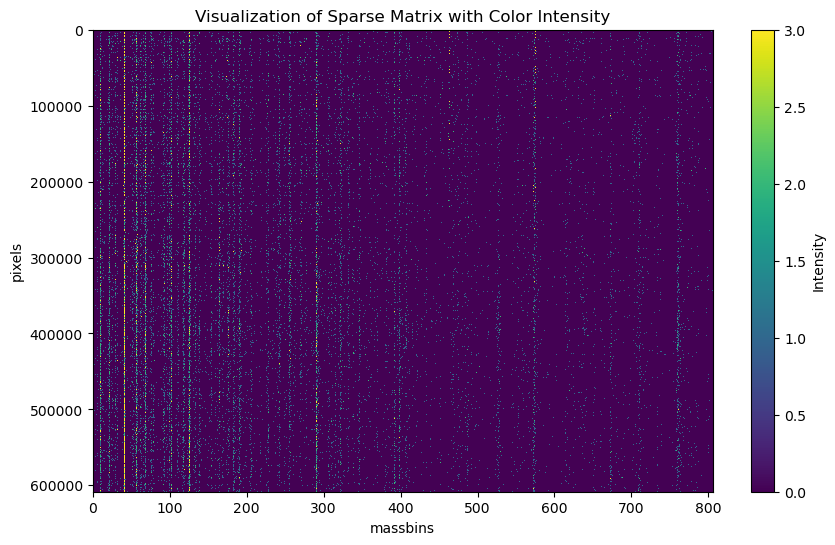

In [5]:
dense_matrix = selected_B_SIMS.toarray()

visualizeData(selected_B_SIMS.toarray())

In [6]:
def find_massbins(dense_matrix):
    a = 3
    massbins = []
    for mz_num in range(dense_matrix.shape[1]):
        massbin = dense_matrix[:,mz_num]
        massbin_E_density = np.sum(massbin)
        if massbin_E_density > a:
            a = massbin_E_density
            massbins.append(mz_num)
            
    return massbins

find_massbins(dense_matrix=dense_matrix)
        
        
        



[0, 9, 40]

In [17]:
def visualizeMassBin(dense_matrix, massbin,shape):
    picturematrix = dense_matrix[:, massbin].reshape(shape)
    # Plot each matrix with its respective colormap
    min_val = np.min(picturematrix)
    max_val = np.max(picturematrix)
    fig, ax = plt.subplots()
    cax = ax.imshow(picturematrix, aspect='equal', cmap='cubehelix', vmin=min_val, vmax=max_val)  # Set aspect to 'equal' and use same limits as original data
    ax.set_title(f'Massbin {massbin} Colormap')
    fig.colorbar(cax, ax=ax)
    
    # Add overall title and show the plot
    fig.suptitle(f'Data of Massbin {massbin}', fontsize=16)
    plt.show() 
    

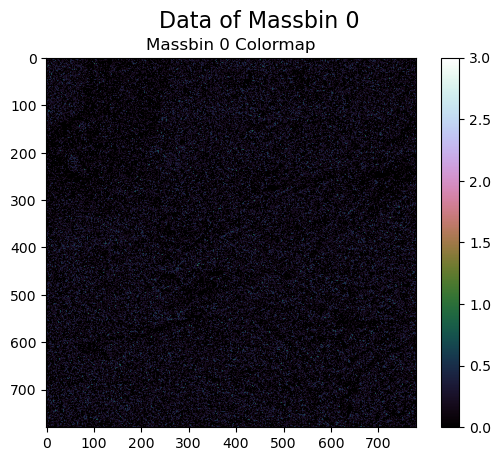

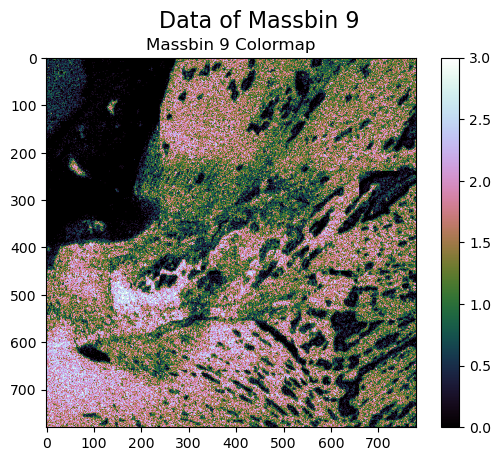

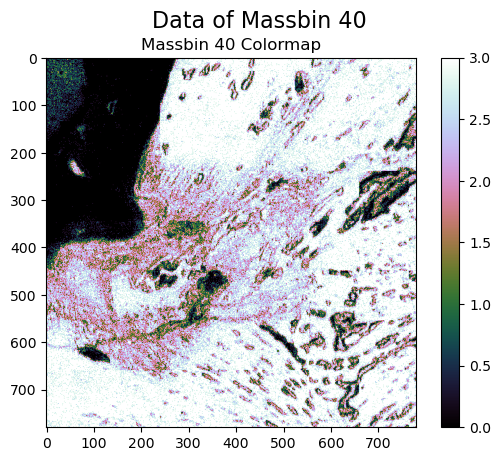

In [25]:
visualizeMassBin(dense_matrix,0, shape_SIMS)
visualizeMassBin(dense_matrix,9, shape_SIMS)
visualizeMassBin(dense_matrix,40, shape_SIMS)

In [9]:
# # Create a sparse matrix
# sparse_matrix = sp.csc_matrix((selected_B_QTOF), shape=shape_QTOF)

# # Convert to dense (numpy array)
# # dense_matrix = sparse_matrix.toarray()

In [10]:
def plotHistData(data):

    # Plotting a basic histogram
    plt.hist(data, bins='auto', color='skyblue', edgecolor='black')
    plt.title(f'with {data.shape} bins')
    # Adding labels and title
    plt.xlabel('m/z values')
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()


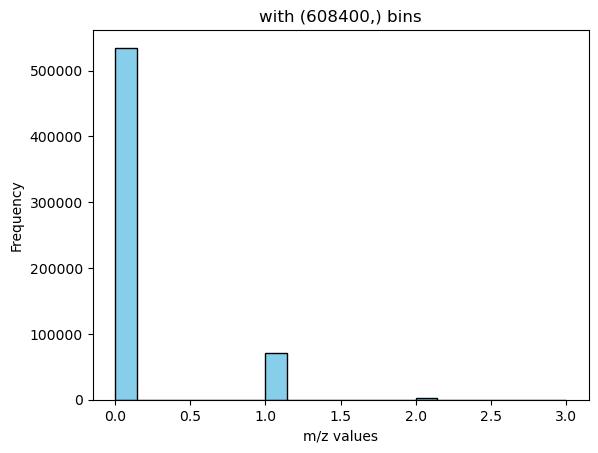

In [22]:
plotHistData( dense_matrix[:, 0])

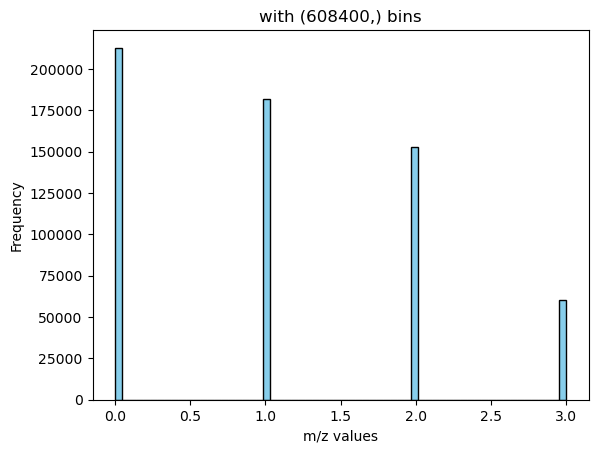

In [23]:
plotHistData( dense_matrix[:, 9])


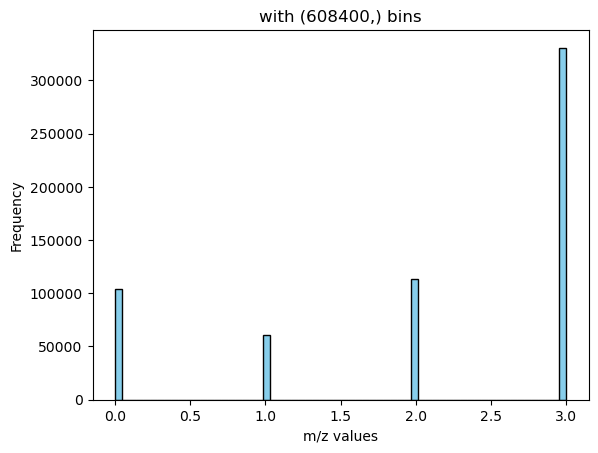

In [24]:
plotHistData( dense_matrix[:, 40])